# Conclusion for my analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns",20)
pd.set_option("display.max_rows",20000)

df = pd.read_csv("../input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [2]:
# Data Cleaning
df.columns = df.columns.str.replace(" ","_")
df.Genre = df.Genre.replace('\s+', '_', regex=True)
df.Reviews = df.Reviews.replace(',', '', regex=True)
df['Price'] = df['Price'].str.strip('$')
df['Price_r'] = df['Price_r'].str.strip('$')
df['Reviews'] = df['Reviews'].astype('int')
df['Price'] = df['Price'].astype('float')
df['Price_r'] = df['Price_r'].astype('int')


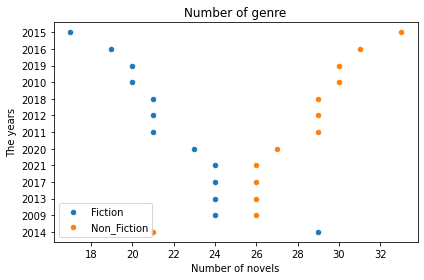

In [3]:
fig, ax= plt.subplots()
df1 = pd.DataFrame()
i=2009
while i <=2021:
    df1[str(i)] = df[df["Year"]==i].Genre.value_counts()
    i+=1
df1 = df1.T.sort_values("Non_Fiction",ascending=True)

fiction = ax.scatter( df1.Fiction,df1.index,20, label="Fiction")
non_fiction = ax.scatter( df1.Non_Fiction,df1.index,20, label="Non_Fiction")
ax.set_ylabel('The years')
ax.set_xlabel('Number of novels')
ax.set_title('Number of genre')
fig.tight_layout()
ax.legend()
plt.show()


In [4]:
soy =[]
for i in df.User_Rating:
    soy.append(round((i/5),2))
df["People_Who_liked_the_novel"] = round(soy*df.Reviews)
df["People_Who_disliked_the_novel"] = (df.Reviews) - (round(soy*df.Reviews))

In [5]:
def Best_Novel_In_Each_Year():
    Best_Novel =[]
    i=2009
    while i <=2021:
        r = df[df["Year"]==i]
        Best_Novel.append(r.min()) 
        i+=1
    df2 = pd.DataFrame(Best_Novel)
    People_Who_liked_the_novel = df2.drop(columns=["People_Who_disliked_the_novel"])
    People_Who_disliked_the_novel= df2.drop(columns=["People_Who_liked_the_novel"])
    return People_Who_disliked_the_novel
Best_Novel_In_Each_Year()


,Name,Author,User_Rating,Reviews,Price,Price_r,Year,Genre,People_Who_disliked_the_novel
0,"Act Like a Lady, Think Like a Man: What Men Re...",Alan Moore,4.0,37,1.00,1,2009,Fiction,3.0
1,A Patriot's History of the United States: From...,Abraham Verghese,4.0,408,0.00,0,2010,Fiction,22.0
2,11/22/63: A Novel,Abraham Verghese,4.0,637,0.00,0,2011,Fiction,76.0
3,Barefoot Contessa Foolproof: Recipes You Can T...,American Psychological Association,3.3,1201,5.00,5,2012,Fiction,52.0
4,Allegiant,Allie Brosh,3.8,220,0.00,0,2013,Fiction,18.0
5,A Game of Thrones / A Clash of Kings / A Storm...,Alice Schertle,3.9,978,0.00,0,2014,Fiction,38.0
6,Adult Coloring Book: Stress Relieving Animal D...,American Psychological Association,3.6,1873,0.00,0,2015,Fiction,56.0
7,10-Day Green Smoothie Cleanse,Adult Coloring Book Designs,4.0,807,0.00,0,2016,Fiction,111.0
8,1984 (Signet Classics),Adam Gasiewski,4.0,1831,0.00,0,2017,Fiction,63.0
9,12 Rules for Life: An Antidote to Chaos,American Psychological Association,4.2,2507,2.00,2,2018,Fiction,100.0


# Conclusion about this analysis
- This analysis block shows the best novels of each year according to the number of people who liked the novel.
- All of novel that obtain highest rate in each year falls below the Non fiction type novels according to lowest novel where falls below Fiction novels.
- The Writer that obtain highest number of novels in best rating novels in all years is **Wizards RPG Team** by it's novels **You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life** , On the other side the writer who obtain highest number of novels that have lowest rate in each year is **American Psychological Association** by multiple novels.